# Introduction
In this excercise, you will get acquainted with:

1. Numpy
2. SciPy
3. Matplotlib


###About limits of Google Colab:   

The 12-hour limit is for a continuous assignment of VM. It means we can use GPU compute even after the end of 12 hours by connecting to a different VM.

### Authors and Lecturers:
* [Jakub Špaňhel](mailto:ispanhel@fit.vutbr.cz)
* [Martin Šůstek](mailto:isustek@fit.vutbr.cz)

---

###Source(s):
* [Real Python](https://realpython.com/)
* [Learn Python](https://www.learnpython.org/en/Welcome)
* [Python for Beginners](https://www.pythonforbeginners.com/)
* [Towards Data Science](https://towardsdatascience.com/programming/home)
* [Digital Ocean](https://www.digitalocean.com/community/tutorial_series/how-to-code-in-python-3)
* [Python Docs](https://docs.python.org/3.6/)
---
* [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/python-numpy-tutorial/#numpy)
* [Numpy Docs](https://docs.scipy.org/doc/numpy/)

# Numpy

**Numpy** is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. 

In this excercise, you will get acquainted with:

##Numpy Arrays
Numpy arrays are great alternatives to Python Lists. Some of the key advantages of Numpy arrays are that they are fast, easy to work with, and give users the opportunity to perform calculations across entire arrays.

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of non-negative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
import numpy as np

py_list = [1,2,3]
print(type(py_list))

a = np.array(py_list)     # Create a rank 1 array   //a = np.array([1,2,3])
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

Numpy also provides many functions to create arrays:

In [ ]:
import numpy as np

a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.34506457 0.3595586 ]
 [0.24042558 0.60112854]]


##Array Indexing

Numpy offers several ways to index into arrays.

###Slicing:
Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

###Integer array indexing
When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
import numpy as np

# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])
      
print(a[-1])

###Boolean array indexing
Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

##Datatypes
Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

##Array math
Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

Note that unlike MATLAB, **\*** is elementwise multiplication, not matrix multiplication. We instead use the **dot** function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. **dot** is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

Numpy provides many useful functions for performing computations on arrays; one of the most useful is  **sum**:

In [ ]:
import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the **T** attribute of an array object:

In [ ]:
import numpy as np

x = np.array([[1,2], [3,4], [5,6]])
print(x)    # Prints "[[1 2]
            #          [3 4]
            #          [5 6]]"
print(x.T)  # Prints "[[1 3 5]
            #          [2 4 6]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

##Broadcasting
Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
import numpy as np

def matrix_vector_addition_for_loop():
    # We will add the vector v to each row of the matrix x,
    # storing the result in the matrix y
    x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
    # print(x)
    v = np.array([1, 0, 1])
    # print(v)

    y = np.empty_like(x)   # Create an empty matrix with the same shape as x

     # Add the vector v to each row of the matrix x with an explicit loop
    for i in range(4):
        y[i, :] = x[i, :] + v

    # Now y is the following
    # [[ 2  2  4]
    #  [ 5  5  7]
    #  [ 8  8 10]
    #  [11 11 13]]
    # print(y)
   
%timeit matrix_vector_addition_for_loop()

This works; however when the matrix **x** is very large, computing an explicit loop in Python could be slow. Note that adding the vector **v** to each row of the matrix **x** is equivalent to forming a matrix **vv** by stacking multiple copies of **v** vertically, then performing elementwise summation of **x** and **vv**. We could implement this approach like this:

In [ ]:
import numpy as np

def matrix_vector_addition_tile():
    # We will add the vector v to each row of the matrix x,
    # storing the result in the matrix y
    x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
    v = np.array([1, 0, 1])
    vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
    # print(vv)                 # Prints "[[1 0 1]
                              #          [1 0 1]
                              #          [1 0 1]
                              #          [1 0 1]]"
    y = x + vv  # Add x and vv elementwise
    # print(y)  # Prints "[[ 2  2  4
              #          [ 5  5  7]
              #          [ 8  8 10]
              #          [11 11 13]]"

%timeit matrix_vector_addition_tile()

Numpy broadcasting allows us to perform this computation without actually creating multiple copies of **v**. Consider this version, using broadcasting:

In [ ]:
import numpy as np

def matrix_vector_addition_broadcasting():
    # We will add the vector v to each row of the matrix x,
    # storing the result in the matrix y
    x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
    v = np.array([1, 0, 1])
    y = x + v  # Add v to each row of x using broadcasting
    # print(y)  # Prints "[[ 2  2  4]
              #          [ 5  5  7]
              #          [ 8  8 10]
              #          [11 11 13]]"

%timeit matrix_vector_addition_broadcasting()

The line **y = x + v** works even though **x** has shape **(4, 3)** and **v** has shape **(3,)** due to broadcasting; this line works as if **v** actually had shape **(4, 3)**, where each row was a copy of **v**, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1.   If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2.   The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3.   The arrays can be broadcast together if they are compatible in all dimensions.
4.   After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5.   In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension
If this explanation does not make sense, try reading the explanation [from the documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or [this explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions [in the documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [ ]:
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]


reshaped_v = np.reshape(v, (3,1))
print(reshaped_v)
print(reshaped_v.shape)

print(reshaped_v * w)
print("="*10)



[[1]
 [2]
 [3]]
(3, 1)
[[ 4  5]
 [ 8 10]
 [12 15]]


In [ ]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x.shape)
print(v.shape)
print(x + v)
print("="*10)

(2, 3)
(3,)
[[2 4 6]
 [5 7 9]]


In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print(x)
print(x.shape)
print(x.T)
print(x.T.shape)

print(x.T + w)
print((x.T + w).T)
print("="*10)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))
print("="*10)





[[1 2 3]
 [4 5 6]]
(2, 3)
[[1 4]
 [2 5]
 [3 6]]
(3, 2)
[[ 5  9]
 [ 6 10]
 [ 7 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]


In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x)
print(x.shape)
print(x * 2)

two_matrix = np.zeros([2,3], dtype=np.uint8)
two_matrix[:,:] = 2
print(two_matrix)
print(two_matrix.shape)



print(x * two_matrix)




[[1 2 3]
 [4 5 6]]
(2, 3)
[[ 2  4  6]
 [ 8 10 12]]
[[2 2 2]
 [2 2 2]]
(2, 3)
[[ 2  4  6]
 [ 8 10 12]]


#Examples
Example usage of NumPy functions and capabilities are shown in this section.

##Reshape


In [ ]:
import numpy as np
data = [[[ -65.95908557,  -63.97341376,  -65.21262771,  -66.93861711,
         -70.78769377,  -73.61286297,  -75.23243746,  -80.64770475,
         -84.10421136,  -78.99697226,  -71.46351301,  -67.32101755,
         -65.0351064 ,  -65.62610111,  -3087.7631902 ,  -67.54645939,
         -68.28877494,  -72.95420378,  -73.62812904,  -67.26848278,
         -65.61348777,  -70.2768999 ,  -76.65572811,  -81.02550208,
         -85.66647233,  -90.98955599,  -93.38079326,  -93.73327595,
         -92.82270407,  -1243.27631479,  -95.4478803 ,  -98.57372858,
        -103.61576192, -104.32309408,  -98.32468459,  -93.78454198,
         -91.15031051,  -87.12076227,  -89.20683953,  -88.6679235 ,
         -87.41669088,  -85.39248604,  -86.71663635,  -86.7539244 ,
         -83.92467452,  -82.73530095,  -84.30922987,  -87.13725382,
         -90.2965852 ,  -91.3575269 ,  -92.6341577 ,  -95.40403562,
         -96.03455137],
       [-127.60488337, -126.78744136, -129.42626472, -131.69108542,
        -135.28616258, -136.60486018, -141.00903636, -144.82758007,
        -147.72975335, -142.34860903, -138.0609529 , -137.42374931,
        -136.9858302 , -1138.91214016, -141.07736956, -142.06590874,
        -144.79720148, -148.15136637, -148.68873208, -145.49461383,
        -144.5246334 , -147.98126686, -153.75259362, -157.9142651 ,
        -9766.07501156, -165.81544251, -167.50199966, -166.56966383,
        -164.80413122, -161.6242469 , -162.39511868, -166.3661404 ,
        -171.07705415, -171.57636758, -168.67068089, -164.70530325,
        -164.18807804, -162.7567039 , -160.86486076, -160.56206055,
        -160.14812257, -161.70260181, -167.45826158, -169.48694892,
        -168.51089872, -167.40135057, -170.08398447, -174.47580537,
        -176.42214106, -178.50921499, -181.1893899 , -183.12524894,
        -183.44057677],
       [ -84.08943757,  -80.17677038,  -83.76441858,  -87.51323658,
         -91.52274662,  -93.79820561,  -2532.81200848, -100.8150816 ,
        -102.92926879,  -99.7400537 ,  -94.20237445,  -91.85917052,
         -91.80935202,  -91.92607225,  -93.38837314,  -93.119015  ,
         -95.66009371, -101.6111642 , -101.66079474,  -98.86925771,
         -94.41973801, -100.15090656, -109.807924  , -113.95008263,
        -115.20177106, -119.7849144 , -123.30110552, -120.88858643,
        -115.81621905, -113.4531334 , -111.92530207, -115.70949071,
        -121.13245102, -121.65179784, -116.10527558, -115.02260002,
        -113.96788241, -113.41387302, -114.92827381, -109.20373796,
        -110.68156638, -113.14419302, -117.87063229, -119.04122253,
        -121.70582088, -121.65817776, -122.62298729, -125.78703857,
        -129.42429778, -130.55227354, -131.96355935, -133.13269934,
        -133.68624668]], [[-224.02935202, -228.69872839, -232.68714074, -235.72229472,
        -240.44601365, -244.32006995, -243.28146546, -241.21004934,
        -241.42747434, -242.57082585, -243.55994386, -246.06472171,
        -249.03477884, -250.01051978, -253.52804718, -264.33666583,
        -273.24171063, -278.22887785, -283.43215628, -285.63337355,
        -292.04371157, -298.27268006, -299.07847258, -303.99401174,
        -309.10907134, -306.75880372, -299.5874599 , -292.86270492,
        -289.88332284, -287.41817823, -287.27042532, -286.68488315,
        -284.75554934],
       [-206.07104955, -208.1317643 , -211.04744627, -213.32465484,
        -218.28938868, -221.2116339 , -220.58588111, -217.16134483,
        -216.65956823, -220.33623987, -227.38607928, -233.56651988,
        -236.13387737, -240.15443318, -246.59704303, -257.14475692,
        -260.19379605, -260.57158547, -262.28611387, -263.11944941,
        -265.06541128, -266.79835747, -264.1736854 , -262.75974967,
        -262.8701131 , -259.37696213, -257.89970589, -259.90012538,
        -264.77749181, -267.58847777, -270.61082555, -270.28207873,
        -269.85675515],
       [-105.78590933, -108.02692863, -111.80515902, -118.43637458,
        -124.33607078, -129.51943699, -130.13195507, -128.29224255,
        -127.09130173, -7239.40419028, -129.57649614, -132.95449397,
        -136.00902046, -139.08420992, -141.4903368 , -152.00279827,
        -158.57996768, -157.39375344, -159.39158489, -160.45208803,
        -164.79173891, -169.15208806, -163.79981219, -163.77769836,
        -166.84268525, -166.46662726, -163.11837329, -163.70250751,
        -170.24806715, -176.06574144, -184.37414437, -186.26929979,
        -183.88191205]], [[  5.70071666,   5.12713829,   9.12781018,  11.70362622,
         10.13608481,   6.80100092,   7.70089958,   9.30970188,
          9.76097884,   7.97374573,   1.90312817,  -3.33420809,
         -3.80346205,  -2.40775293,  -1.45059938,  -2.51134658,
         -6.63329981,  -8.60570227,  -8.15197965,  -8.14912188,
         -8.47252146,  -1003.49706042,  -6.87947061,  -7.18442616,
         -5.79165292,  -2.89682476,   1.17506168,   0.59401666,
         -1.06916705,  -0.40562673,  -1.41860488,  -6.77354   ,
        -10.64125177],
       [ -7.237638  ,  -6.84331153,  -5.14669192,  -5.954364  ,
         -7.01253221,  -9.31842753, -12.96315608, -11.91180273,
        -11.28399524, -15.63413343, -22.32575368, -24.71818728,
        -23.22836861, -21.11178396, -16.77498367, -11.68159769,
        -14.38397752, -8736.30488814, -18.98802538, -18.31711367,
        -21.79791775, -21.99682231, -20.01055706, -21.84203479,
        -22.86999302, -18.56879304, -14.85296358, -16.20303961,
        -18.88507979, -18.01360735, -20.48946737, -24.65644813,
        -27.08230888],
       [ -9.02620894, -10.68612796,  -8.61261759,  -6.359211  ,
         -9.79291434, -15.99962428, -14.03317675, -15.19579242,
        -17.8500015 , -19.01172887, -25.22487329, -29.27951724,
        -28.27397776, -27.08336058, -21.7031801 , -17.90607775,
        -20.80455754, -24.78908596, -28.71616619, -30.9085876 ,
        -36.06247522, -38.93577809, -38.00513618, -34.56044414,
        -33.14300774, -30.35872662, -24.8165557 , -24.34782338,
        -27.47534306, -29.2885564 , -29.72503702, -31.53940821,
        -36.61558685]], [[ 90.26312268,  91.13381673,  92.6952902 ,  96.69638844,
         96.56799993,  95.51706567,  88.18313927,  83.42033174,
         85.14173327,  90.25793917,  96.45917536, 100.68493498,
        102.96869233,  99.78246472,  98.75646903,  98.39893702,
         95.28441388,  93.49190811,  94.54285771,  93.65135258,
         94.2245991 ,  95.98760426,  92.6078526 ],
       [ 61.69719083,  62.01635541,  65.08206737,  68.36723613,
         68.55608132,  66.76290878,  61.90752121,  55.24706826,
         53.0958029 ,  97.20097564,  60.77531437,  60.40447683,
         60.67338216,  58.94867873,  55.53638337,  53.8705792 ,
         49.26466618,  44.31864364,  41.38884348,  43.11953878,
         47.31865184,  49.20772085,  43.70284646],
       [ 79.43374139,  80.6404031 ,  80.90720566,  82.26434351,
         83.51788042,  84.28143729,  76.63248792,  70.80074924,
         69.32491328,  71.89742613,  77.08434398,  80.29479058,
         81.87551329,  79.29940657,  78.32280189,  74.5175998 ,
         68.74061814,  65.63432839,  65.43966712,  61.21508507,
         62.33681306,  64.74878994,  62.2436584 ]], [[-36.18753749, -37.03554495, -38.53776678, -37.60481948,
        -37.01578926, -38.69967603, -41.45451718, -40.63522   ,
        -39.06071837, -37.38955169, -36.43339673, -34.9708296 ,
        -32.62346652, -33.66951597, -36.07629012, -36.6886998 ,
        -37.10539836, -36.21078919, -33.20709699, -32.3336532 ,
        -33.30456627, -33.93416476, -36.01188862, -39.30193979,
        -41.04270376, -41.69627919, -39.54117021, -38.98375974,
        -36.86993841, -36.14021   , -35.60963712, -39.96694062,
        -39.96084526],
       [-70.59582149, -74.59435201, -75.39347971, -73.78138144,
        -73.10238382, -73.16348582, -75.10955466, -74.8922735 ,
        -73.36452895, -71.43741664, -71.51866355, -70.70121226,
        -69.35804362, -70.64317651, -71.33670408, -71.47076748,
        -71.23694516, -67.14325916, -67.98376475, -69.52694695,
        -68.95330395, -67.51193735, -70.17692268, -72.86579382,
        -74.78295192, -76.70029432, -75.86263605, -73.36178313,
        -69.63567515, -68.71721805, -73.45202056, -76.52856995,
        -77.32081966],
       [-57.64889074, -62.7726187 , -63.24885061, -63.83504172,
        -62.72010938, -63.86851998, -67.23911484, -66.12908402,
        -64.64331813, -65.66363293, -66.53735897, -69.07832008,
        -66.38018917, -66.06767723, -71.89114755, -74.72768917,
        -74.83225677, -69.93216421, -68.94676288, -69.20660278,
        -71.23535417, -73.62502972, -72.12966312, -75.91540242,
        -77.62234853, -80.61434939, -77.22789903, -75.95908819,
        -72.74391122, -73.70723943, 9375.94298682, -80.04454022,
        -79.44712166]]]


print(np.array(data, dtype=object).shape)

# Imagine that you obtained this dataset and the description as:
"""We have measured the values in 5 experiments, each experiment differs in length.
All experiments were measured by 3 devices. We know that measured values are not perfect,
so if we measure a value bigger than 1000 or lower than -1000, we should not take into account the measurement from the device in the experiment.
"""
# Can you compute the maximum and the minimum of each device per each experiment, but ignore them if the condition is not met? 
# The result will be a list of maximum of 5 values for max/min per each device?
# Take a look at data and notice that you cannot use only one 3D numpy array because it differs in length.
data = [np.array(d) for d in data]

MAX_VAL = 1000

def print_max_min(data):
    min_v, max_v = [],[]
    for v in data:
        min_v.append(np.min(v, axis = 1))
        max_v.append(np.max(v, axis = 1))
    min_v = np.array(min_v)
    max_v = np.array(max_v)
    print("\nMIN")
    print(min_v)
    print("MAX")
    print(max_v)

    # NOTE: this is just example how to use where, numpy has much more suitable function 
    # https://numpy.org/doc/stable/reference/generated/numpy.clip.html
    
    clipped_min_v = np.where(min_v > -MAX_VAL, min_v, -MAX_VAL)
    clipped_max_v = np.where(max_v < MAX_VAL, max_v, MAX_VAL)

    print("\nClipped MIN")
    print(clipped_min_v)
    print("Clipped MAX")
    print(clipped_max_v)    

    #print(np.where(min_v.T[0] > -MAX_VAL))
    valid_min_v = [a[np.where(a > -MAX_VAL)] for a in min_v.T]
    valid_max_v = [a[np.where(a < MAX_VAL)] for a in max_v.T]

    print("\nValid MIN (per device)")
    print(valid_min_v)
    print("Valid MAX (per device)")
    print(valid_max_v)

print_max_min(data)




(5, 3)

MIN
[[-3087.7631902  -9766.07501156 -2532.81200848]
 [ -309.10907134  -270.61082555 -7239.40419028]
 [-1003.49706042 -8736.30488814   -38.93577809]
 [   83.42033174    41.38884348    61.21508507]
 [  -41.69627919   -77.32081966   -80.61434939]]
MAX
[[-6.39734138e+01 -1.26787441e+02 -8.01767704e+01]
 [-2.24029352e+02 -2.06071050e+02 -1.05785909e+02]
 [ 1.17036262e+01 -5.14669192e+00 -6.35921100e+00]
 [ 1.02968692e+02  9.72009756e+01  8.42814373e+01]
 [-3.23336532e+01 -6.71432592e+01  9.37594299e+03]]

Clipped MIN
[[-1000.         -1000.         -1000.        ]
 [ -309.10907134  -270.61082555 -1000.        ]
 [-1000.         -1000.           -38.93577809]
 [   83.42033174    41.38884348    61.21508507]
 [  -41.69627919   -77.32081966   -80.61434939]]
Clipped MAX
[[ -63.97341376 -126.78744136  -80.17677038]
 [-224.02935202 -206.07104955 -105.78590933]
 [  11.70362622   -5.14669192   -6.359211  ]
 [ 102.96869233   97.20097564   84.28143729]
 [ -32.3336532   -67.14325916 1000.      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:187: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


#SciPy
Numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. SciPy builds on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.

The best way to get familiar with SciPy is to [browse the documentation](http://docs.scipy.org/doc/scipy/reference/index.html). We will highlight some parts of SciPy that you might find useful for this class.

##Distance between points
SciPy defines some useful functions for computing distances between sets of points.

The function **scipy.spatial.distance.pdist** computes the distance between all pairs of points in a given set:

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[1 2]
#  [2 1]
#  [3 1]]
x = np.array([[1, 2], [2, 1], [3, 1]])
print(x)
# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
#print(pdist(x, 'euclidean'))
print(d)

[[1 2]
 [2 1]
 [3 1]]
[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


You can read all the details about this function [in the documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html).

A similar function (**scipy.spatial.distance.cdist**) computes the distance between all pairs across two sets of points; you can read about it [in the documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html).

#Matplotlib
Matplotlib is a plotting library. In this section give a brief introduction to the matplotlib.pyplot module, which provides a plotting system similar to that of MATLAB.


##Plotting
The most important function in matplotlib is **plot**, which allows you to plot 2D data. Here is a simple example:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You must call plt.show() to make graphics appear.


With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

You can read much more about the plot function [in the documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

##Subplots
You can plot different things in the same figure using the **subplot** function. Here is an example:

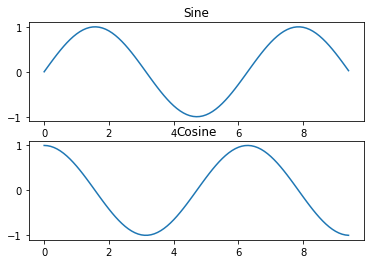

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the subplot function in the documentation.

##Images
You can use the imshow function to show images. Here is an example:


[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]


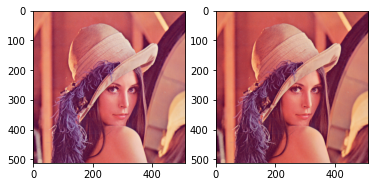

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave, imshow
from skimage.transform import resize
url = "http://www.fit.vutbr.cz/~ispanhel/data/BISSIT/Lenna_test_image.png"

# Read an JPEG image into a numpy array
## img = imread('Lenna_test_image.png')              
img = np.asarray(imread(url))
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()

##Examples

### Visualizing data distribution

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


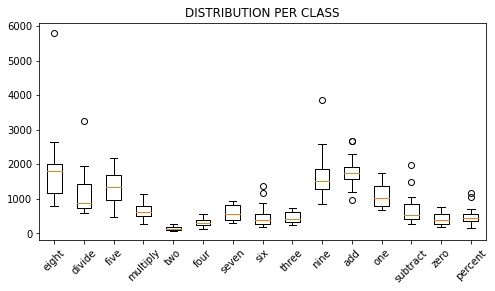

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [[1503.86147173, 5800.72959384,  804.3129919 , 1003.96300786,
       1091.72255514, 2632.5108726 , 2297.25297041, 1165.17694612,
       1763.57964739, 1851.60241893, 1953.80121046, 2011.90061341,
       1824.42347476, 1206.152983  ], [1429.96865728, 3243.48877115,  731.60082458,  719.56709024,
       1012.90662886, 1284.99488631, 1782.31706214,  733.63382987,
        761.6524857 ,  596.69075452,  759.5981745 ,  706.75779481,
       1379.85652052, 1943.7133019 ], [1881.80350561, 1321.69314025, 1676.88324532, 1593.38289173,
       2081.73757912, 2183.33471524, 1596.65029401,  862.10030661,
       1036.34412763,  912.88895   ,  461.54488143, 1681.85552071,
        817.13929949, 1249.19597184, 1356.59874863], [1152.80350917,  957.24147401,  496.96172517,  593.41898079,
        797.67704616,  798.17209273,  279.21715829,  504.98527085,
        361.73534912,  785.36211998,  629.1483132 ,  624.79780721,
        293.31112151,  965.23604933], [266.13142948, 169.1273822 , 182.99678201, 118.48653703,
       252.00125373, 287.36127904, 116.73944663,  82.7309559 ,
       151.02536526, 101.96242073,  92.80589317,  91.78823894,
       119.15110648, 169.63132133], [319.04527868, 300.51088728, 238.36717435, 229.73870182,
       393.53273122, 154.86993506, 377.72935633, 412.57623214,
       297.52338358, 118.1260811 , 510.01547972, 553.51539757,
       283.04720091, 357.04176309], [871.86714405, 945.81375197, 809.3748729 , 339.93666927,
       516.28397456, 765.99710978, 360.03321702, 448.14351022,
       816.84731857, 860.41176771, 293.8850374 , 368.9346631 ,
       632.96153552, 459.09077019], [ 579.94141451, 1184.10963027,  876.64197722, 1369.72370265,
        367.7690858 ,  524.36476497,  253.15380216,  180.27778862,
        402.75404476,  462.89359339,  296.92996763,  327.18283839,
        272.48540772,  226.62991604], [579.2547624 , 668.69485381, 647.49055288, 746.80106362,
       350.77559262, 424.99957968, 426.13443751, 308.01604888,
       243.63343696, 243.45839333, 285.74945335, 344.19380197,
       704.84586578, 589.17165744], [1881.30512043, 1780.13749483, 1469.44580841, 1572.40069217,
       2600.26748309, 1365.1982741 , 2063.1662555 , 1058.74518105,
       1278.30583834,  846.81745864, 1273.5504698 , 1172.58544219,
       1714.33479634, 3862.72200194], [1900.39597873, 2297.24578062, 1764.91873846, 1922.65541997,
       1185.63056488, 2675.58573251, 1693.71623118, 1801.87252954,
       1705.58619939,  977.78578874, 1533.35329679, 1389.79658787,
       2680.41572831, 1649.76481744], [1498.27453694,  799.5949579 , 1382.60253929, 1386.43958412,
       1104.53951996,  880.12940485, 1762.92456954, 1743.2868637 ,
        780.84587824,  667.05206325, 1283.29594546,  670.29784216,
        967.85201076,  683.73811812], [ 604.05272127,  928.6873002 ,  525.03706962,  386.40262878,
        609.13472489,  451.53638153, 1058.29427864, 1491.98993011,
        533.27503594,  290.60008019,  407.74998002,  271.04072222,
        766.00901556, 1987.2051126 ,  496.95043013], [588.4416558 , 592.78276812, 304.78543004, 630.54157949,
       756.98034665, 352.10162346, 179.71231744, 257.99945698,
       259.18377526, 492.74320967, 477.20523215, 294.76100115,
       221.23467038, 439.59287937], [ 508.48111572,  710.53990008, 1068.64386198, 1177.39970703,
        532.33212151,  175.80458522,  354.69382961,  375.75266492,
        157.7668589 ,  451.09833884,  467.32154391,  360.12329674]]

fig, ax = plt.subplots(figsize = (8,4))
ax.set_title("DISTRIBUTION PER CLASS")
ax.boxplot(data)

labels = ['eight', 'divide', 'five', 'multiply', 'two', 'four', 'seven', 'six', 'three', 'nine', 'add', 'one', 'subtract', 'zero', 'percent']
plt.xticks(np.arange(len(labels)) + 1,labels,rotation = 45)
plt.show()

### Visualizing the model accuracy on different datasets

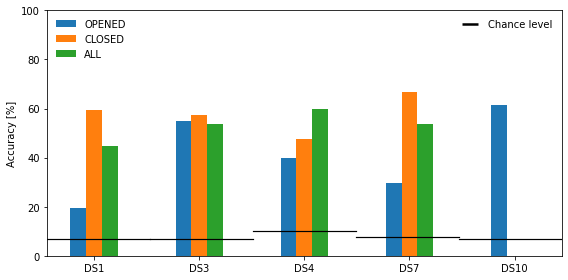

In [ ]:
from matplotlib import lines
from matplotlib.legend import Legend

def show_accuracies(accuracies, datasets, chance_lvls, labels):
    fig, ax = plt.subplots(figsize = (8,4))
    indices = np.arange(len(datasets))
    bar_width = 0.15

    # Put bars
    for i in range(len(labels)):
        ax.bar(indices + i * bar_width, tuple(100 * accuracies[:,i]), bar_width, label=labels[i])
        
    # Put lines that represents chance level
    seg_len = 1 / float(len(datasets))
    for i in range(len(datasets)):    
        plt.axhline(y=100 * chance_lvls[i], xmin = seg_len * i, xmax= seg_len * (i+1),linewidth=1.2,color="black")

    
    ax.set_ylabel('Accuracy [%]')
    ax.set_ylim(0, 100)

    # Find convinient positions to put labels on x axis
    plt.xticks(indices + (len(labels)-1) * bar_width / 2.0, tuple(datasets), rotation=0)

    # Use nice legend for chance level line and put it on different position in the plot
    vertical_line = lines.Line2D([], [], marker='_', color="black", linestyle='None', markersize=16, markeredgewidth=2.5, label='Chance level')
    handles, _ = ax.get_legend_handles_labels()  
    ax.legend(handles = handles[:3], loc='upper left', frameon=False)
    leg = Legend(ax, handles[3:] + [vertical_line], labels[3:] + ['Chance level'], loc='upper right', frameon=False)
    ax.add_artist(leg);
    fig.tight_layout()

    
    
accuracies = np.array([[0.196 , 0.550 , 0.400 , 0.298 , 0.614],
[0.596 , 0.575 , 0.475 , 0.667 , 0],
[0.447 , 0.537 , 0.600 , 0.537 , 0]]).T

datasets = ["DS1","DS3","DS4","DS7","DS10"]
number_of_classes = np.array([15, 15, 10, 13, 15])
show_accuracies(accuracies, datasets, 1.0 / number_of_classes, ["OPENED", "CLOSED", "ALL"])
